In [3]:
!pip install keras

In [26]:
!pip install tensorflow

In [4]:
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers

In [5]:
#Initializing the CNN
#there is also a graph option but we'll use sequential ANN Model
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
#32 Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machinesw


In [6]:
#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
#step -3 Flattening
classifier.add(Flatten())

In [8]:
classifier.add(Dense(activation="relu", units=256)) #hidden layer
classifier.add(Dense(activation="sigmoid", units=1)) #hidden layer

In [10]:
#compiling the cnn

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy']) 
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [33]:
#Fitting to CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '../input/chestxraydataset/chest_xray/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '../input/chestxraydataset/chest_xray/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [34]:
results=classifier.fit(
        training_set,
        steps_per_epoch=130,
        epochs=100,
        validation_data=test_set,
        validation_steps=18)

Epoch 1/100
130/130 [==============================] - 57s 433ms/step - loss: 0.5841 - accuracy: 0.7516 - val_loss: 0.6410 - val_accuracy: 0.6354
Epoch 2/100
130/130 [==============================] - 56s 427ms/step - loss: 0.5121 - accuracy: 0.7487 - val_loss: 0.6827 - val_accuracy: 0.6476
Epoch 3/100
130/130 [==============================] - 55s 426ms/step - loss: 0.3618 - accuracy: 0.8399 - val_loss: 0.4219 - val_accuracy: 0.8264
Epoch 4/100
130/130 [==============================] - 55s 421ms/step - loss: 0.3166 - accuracy: 0.8598 - val_loss: 0.4693 - val_accuracy: 0.7587
Epoch 5/100
130/130 [==============================] - 55s 425ms/step - loss: 0.2970 - accuracy: 0.8782 - val_loss: 0.4161 - val_accuracy: 0.8142
Epoch 6/100
130/130 [==============================] - 55s 422ms/step - loss: 0.3244 - accuracy: 0.8645 - val_loss: 0.4263 - val_accuracy: 0.8056
Epoch 7/100
130/130 [==============================] - 55s 421ms/step - loss: 0.2690 - accuracy: 0.8832 - val_loss: 0.3954 -

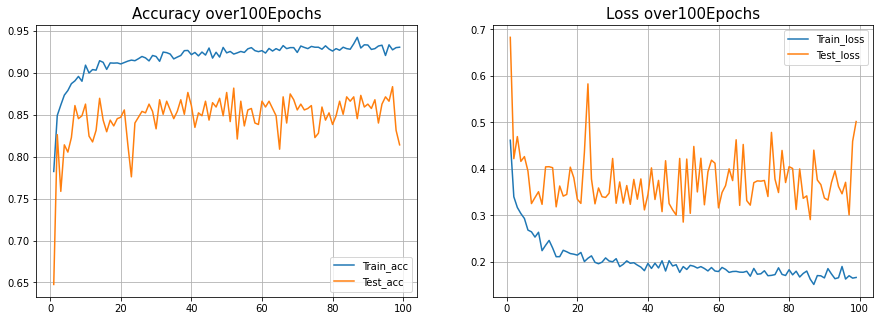

In [35]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over' + str(epochs) +  'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 100)

In [41]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('../input/chestxraydataset/chest_xray/test/PNEUMONIA/person109_bacteria_519.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)


{'NORMAL': 0, 'PNEUMONIA': 1}


Populating the interactive namespace from numpy and matplotlib


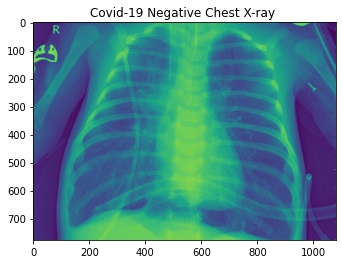

In [44]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('../input/chestxraydataset/chest_xray/test/PNEUMONIA/person109_bacteria_519.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('Covid-19 Negative Chest X-ray ')


In [45]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)


AI's prediction is: covid


In [46]:
test_image = image.load_img('../input/chestxraydataset/chest_xray/train/NORMAL/IM-0147-0001.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


Populating the interactive namespace from numpy and matplotlib


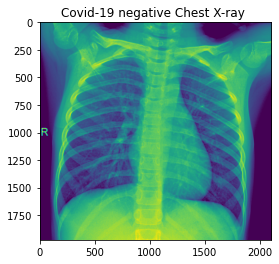

In [50]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('../input/chestxraydataset/chest_xray/train/NORMAL/IM-0147-0001.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('Covid-19 negative Chest X-ray ')

In [51]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: covid


Populating the interactive namespace from numpy and matplotlib


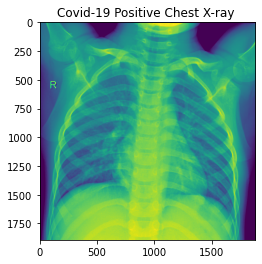

In [53]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('../input/chestxraydataset/chest_xray/train/NORMAL/IM-0172-0001.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

img=mpimg.imread('../input/chestxraydataset/chest_xray/train/NORMAL/IM-0172-0001.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('Covid-19 Positive Chest X-ray ')

In [54]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: covid


In [55]:
!pip install opencv-python

In [57]:
test_set.reset() 
pred = classifier.predict_generator(test_set,18,verbose=1)
print('Predictions finished')

18/18 [==============================] - 6s 317ms/step
Predictions finished
